In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm 
#from scripy.stats import skewnorm
import datetime as dt

In [2]:
df_dollars = pd.read_csv('Restaurant data.csv')
df_dollars['DATE'] = pd.to_datetime(df_dollars['DATE'])
df_dollars['DATE'] =df_dollars['DATE'].dt.strftime('%Y-%m-%d')
df_dollars.head()

,DATE,MRTSSM7225USN
0,1992-01-01,13325
1,1992-02-01,13474
2,1992-03-01,14346
3,1992-04-01,14065
4,1992-05-01,15077


In [3]:
df_dollars.rename(columns={'MRTSSM7225USN': 'Millions_Dollars', 'DATE': 'Date'}, inplace = True)

Text(0.5, 1.0, ' Restaurant Sales (1992-2020)')

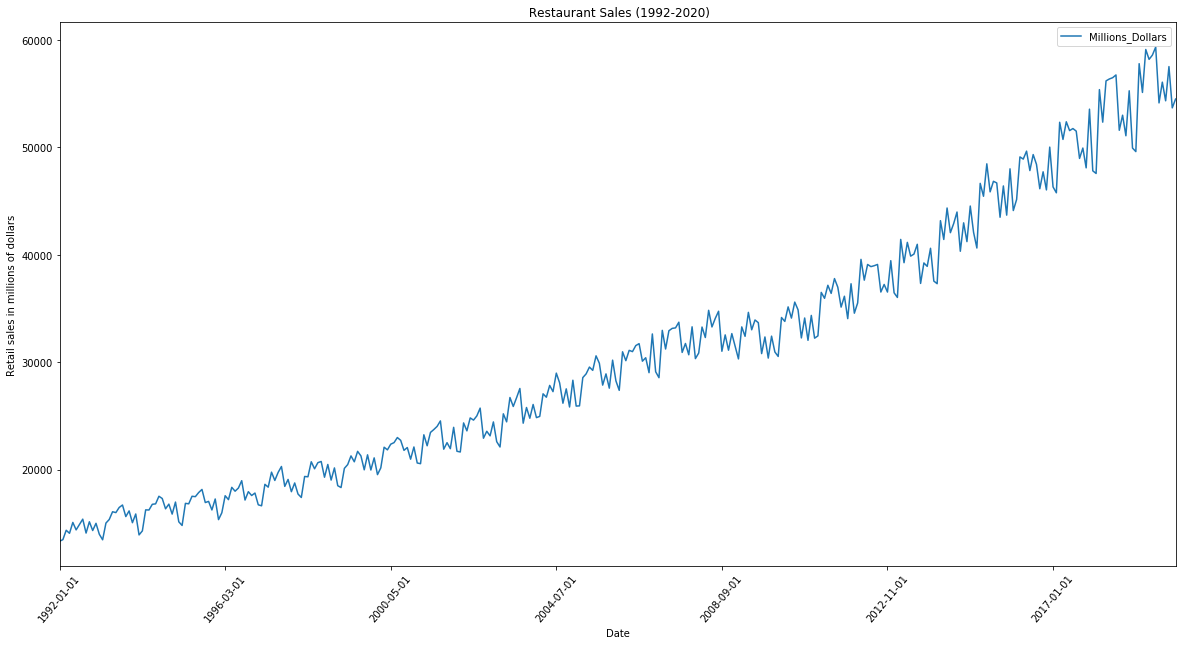

In [4]:
fig =df_dollars.plot.line(x='Date',rot=50,figsize=(20,10))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title(' Restaurant Sales (1992-2020)')

In [5]:
inflation = pd.read_csv('inflation_values.csv')


In [6]:
inflation.head()
inflation.shape

(339, 3)

In [7]:
inflation.rename(columns={'Unnamed: 0':'year'}, inplace=True)
inflation = inflation.fillna(0)
inflation = inflation.astype({'year':int})
inflation.set_index('year')

,inflation rate in %,adjusted inflation
year,,
0,0.15%,0.998500
1,0.36%,0.994905
2,0.51%,0.989831
3,0.14%,0.988446
4,0.14%,0.987062
...,...,...
334,-0.05%,0.533561
335,-0.09%,0.534041
336,0.39%,0.531958


In [8]:
restaurant_sales = df_dollars.assign(inflation = inflation['inflation rate in %']) 
restaurant_sales = df_dollars.assign(inflation_adjusted = inflation['adjusted inflation']) 
restaurant_sales.head()

,Date,Millions_Dollars,inflation_adjusted
0,1992-01-01,13325,0.998500
1,1992-02-01,13474,0.994905
2,1992-03-01,14346,0.989831
3,1992-04-01,14065,0.988446
4,1992-05-01,15077,0.987062


In [9]:
restaurant_inflated = []
for ind, row in restaurant_sales.iterrows():
    if (ind == 0):
        sales = restaurant_sales.loc[ind, 'Millions_Dollars'] 
        restaurant_inflated.append(sales)
    elif (ind == 339): 
        continue
    else:
        sales = restaurant_sales.loc[ind, 'Millions_Dollars']
        percent_inflation = (restaurant_sales.loc[ind-1, 'inflation_adjusted']) 
        adjusted = sales * percent_inflation
        restaurant_inflated.append(adjusted)

In [10]:
restaurant_sales = restaurant_sales.assign(restaurant_adjusted = restaurant_inflated)
restaurant_sales.shape

(338, 4)

Text(0.5, 1.0, 'Restaurant Sales (1992-2020)')

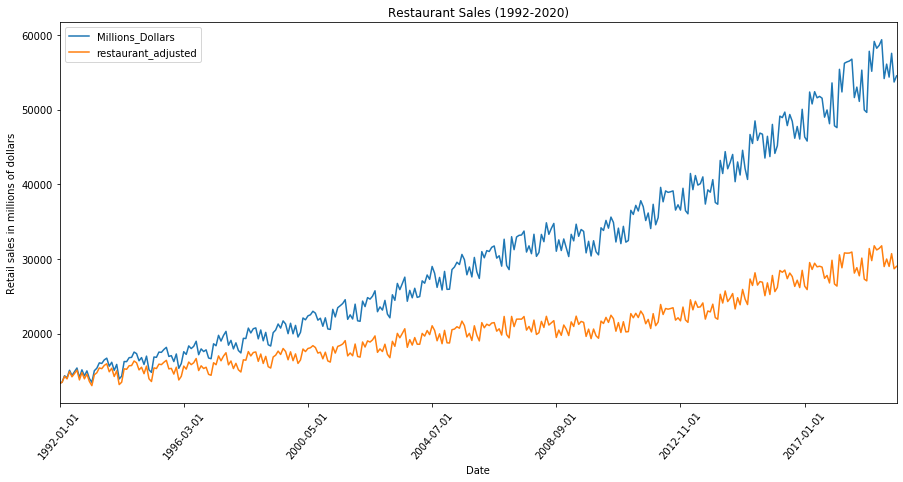

In [11]:
fig = restaurant_sales.plot.line(x='Date',y=['Millions_Dollars','restaurant_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Restaurant Sales (1992-2020)')

Text(0.5, 1.0, 'Restaurant Sales (1992-2020)')

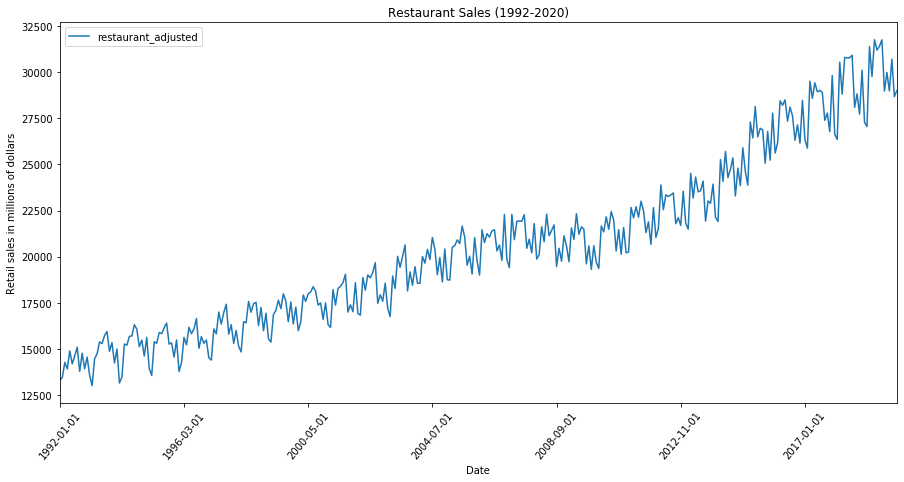

In [12]:
fig = restaurant_sales.plot.line(x='Date',y=['restaurant_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Restaurant Sales (1992-2020)')

In [13]:
url = 'https://raw.githubusercontent.com/agoebel8990/Group-54/master/ApprovalDataTo1989.csv'
approval_datadf = pd.read_csv(url, error_bad_lines = False)

In [14]:
approval_datadf.head()

,End Date,Approving,Disapproving,Unsure/NoData,President
0,2020-04-30,46.0,50.5,5.5,Trump
1,2020-03-31,46.5,48.5,5.0,Trump
2,2020-02-29,48.0,49.5,2.5,Trump
3,2020-01-31,46.5,51.5,2.0,Trump
4,2019-12-31,45.0,51.0,4.0,Trump


In [15]:
approval_datadf['date_month'] = approval_datadf['End Date'].str[:7]
approval_datadf

,End Date,Approving,Disapproving,Unsure/NoData,President,date_month
0,2020-04-30,46.0,50.500000,5.500000,Trump,2020-04
1,2020-03-31,46.5,48.500000,5.000000,Trump,2020-03
2,2020-02-29,48.0,49.500000,2.500000,Trump,2020-02
3,2020-01-31,46.5,51.500000,2.000000,Trump,2020-01
4,2019-12-31,45.0,51.000000,4.000000,Trump,2019-12
...,...,...,...,...,...,...
374,1989-05-31,58.4,20.400000,20.000000,Bush,1989-05
375,1989-04-30,55.5,16.500000,26.500000,Bush,1989-04
376,1989-03-31,60.0,14.666667,24.333333,Bush,1989-03
377,1989-02-28,60.0,11.000000,27.000000,Bush,1989-02


In [16]:
restaurant_sales['date_month'] = restaurant_sales['Date'].str[:7]

In [17]:
df = pd.merge(restaurant_sales, approval_datadf, how = 'outer')
df

,Date,Millions_Dollars,inflation_adjusted,restaurant_adjusted,date_month,End Date,Approving,Disapproving,Unsure/NoData,President
0,1992-01-01,13325.0,0.998500,13325.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush
1,1992-02-01,13474.0,0.994905,13453.789000,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush
2,1992-03-01,14346.0,0.989831,14272.912868,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush
3,1992-04-01,14065.0,0.988446,13921.978394,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush
4,1992-05-01,15077.0,0.987062,14902.794590,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush
...,...,...,...,...,...,...,...,...,...,...
374,NaN,NaN,NaN,NaN,1989-05,1989-05-31,58.400000,20.400000,20.000000,Bush
375,NaN,NaN,NaN,NaN,1989-04,1989-04-30,55.500000,16.500000,26.500000,Bush
376,NaN,NaN,NaN,NaN,1989-03,1989-03-31,60.000000,14.666667,24.333333,Bush
377,NaN,NaN,NaN,NaN,1989-02,1989-02-28,60.000000,11.000000,27.000000,Bush


In [18]:
df.dropna(inplace = True)
df

,Date,Millions_Dollars,inflation_adjusted,restaurant_adjusted,date_month,End Date,Approving,Disapproving,Unsure/NoData,President
0,1992-01-01,13325.0,0.998500,13325.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush
1,1992-02-01,13474.0,0.994905,13453.789000,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush
2,1992-03-01,14346.0,0.989831,14272.912868,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush
3,1992-04-01,14065.0,0.988446,13921.978394,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush
4,1992-05-01,15077.0,0.987062,14902.794590,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush
...,...,...,...,...,...,...,...,...,...,...
336,2019-10-01,56083.0,0.533294,29977.695704,2019-10,2019-10-31,40.000000,57.000000,3.000000,Trump
337,2019-11-01,54348.0,0.533561,28983.481308,2019-11,2019-11-30,43.000000,54.000000,3.000000,Trump
338,2019-12-01,57533.0,0.534041,30697.364823,2019-12,2019-12-31,45.000000,51.000000,4.000000,Trump
339,2020-01-01,53688.0,0.531958,28671.604031,2020-01,2020-01-31,46.500000,51.500000,2.000000,Trump


Text(0.5, 1.0, 'The relationship between approval of the president and restaurant spending(1992-2020)')

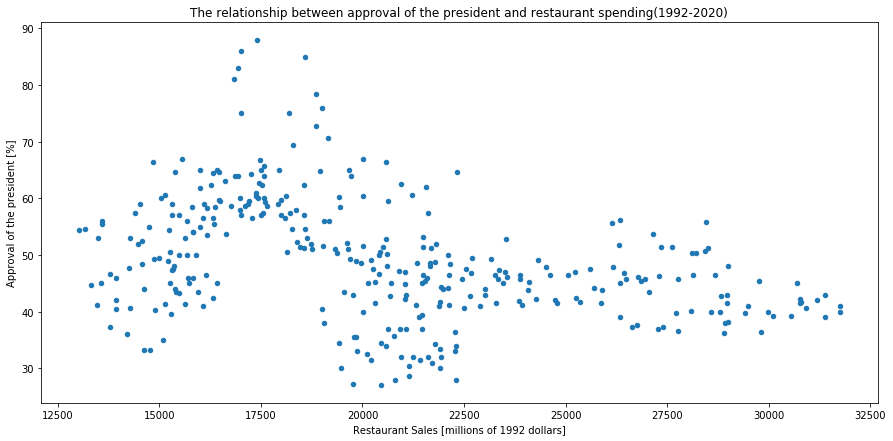

In [19]:
fig = df.plot.scatter(x='restaurant_adjusted', y='Approving', figsize=(15,7))
fig.set_xlabel('Restaurant Sales [millions of 1992 dollars]')
fig.set_ylabel('Approval of the president [%]')
fig.set_title('The relationship between approval of the president and restaurant spending(1992-2020)')

Text(0.5, 1.0, 'The relationship between approval of the president and restaurant spending(1992-2020)')

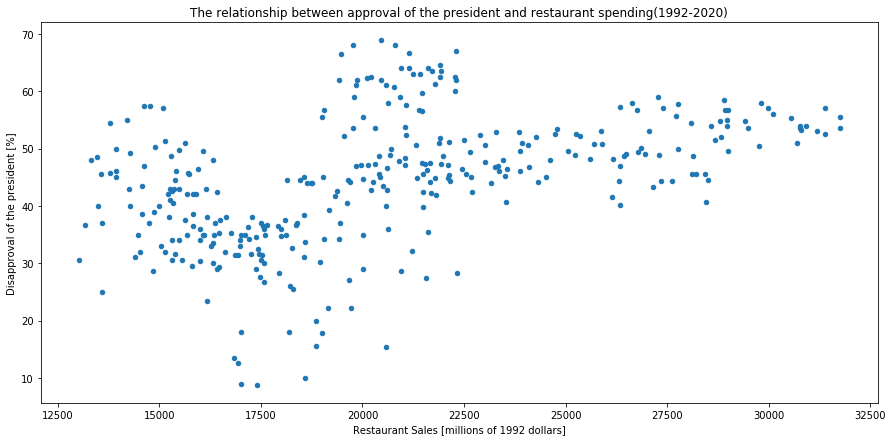

In [20]:
fig = df.plot.scatter(x='restaurant_adjusted', y='Disapproving', figsize=(15,7))
fig.set_xlabel('Restaurant Sales [millions of 1992 dollars]')
fig.set_ylabel('Disapproval of the president [%]')
fig.set_title('The relationship between approval of the president and restaurant spending(1992-2020)')

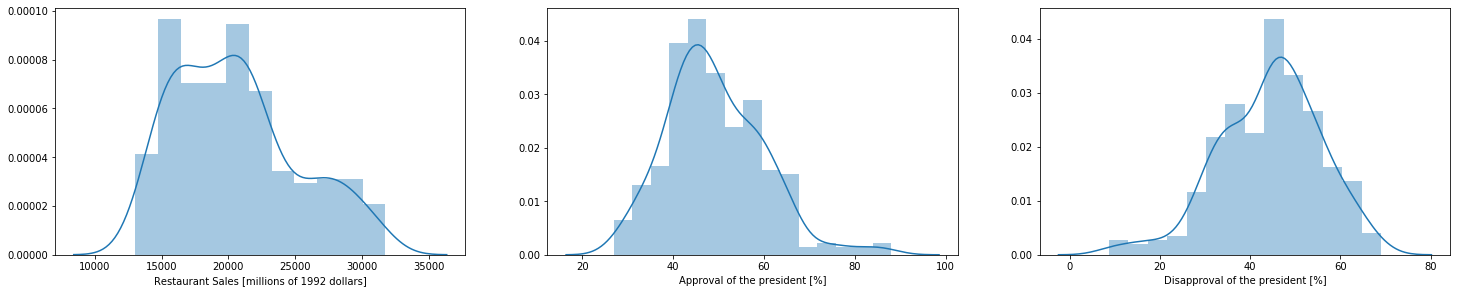

In [31]:
plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df['restaurant_adjusted'])
plt.xlabel('Restaurant Sales [millions of 1992 dollars]')

plt.subplot(232)
sns.distplot(df['Approving'])
plt.xlabel('Approval of the president [%]');

plt.subplot(233)
sns.distplot(df['Disapproving'])
plt.xlabel('Disapproval of the president [%]');

In [22]:
outcome, predictors = patsy.dmatrices('Approving ~ restaurant_adjusted', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     55.39
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           8.23e-13
Time:                        10:46:16   Log-Likelihood:                -1264.7
No. Observations:                 341   AIC:                             2533.
Df Residuals:                     339   BIC:                             2541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              66.8941    

# Negative Correlation

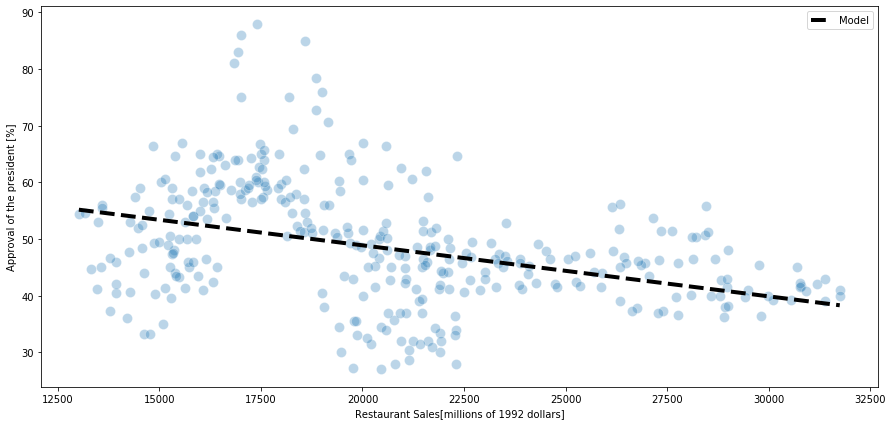

In [23]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='restaurant_adjusted', y='Approving', alpha=0.3, data=df, s=100)
xs = np.arange(df['restaurant_adjusted'].min(), df['restaurant_adjusted'].max())
ys = -0.0009 * xs + 66.8941
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Restaurant Sales[millions of 1992 dollars]')
plt.ylabel('Approval of the president [%]')
plt.legend();

# Transformed sale data to percent max (like in Auto sales)

In [24]:
df['max_percent_sales'] = ((df['restaurant_adjusted'] / df['restaurant_adjusted'].max()) * 100)
df

,Date,Millions_Dollars,inflation_adjusted,restaurant_adjusted,date_month,End Date,Approving,Disapproving,Unsure/NoData,President,max_percent_sales
0,1992-01-01,13325.0,0.998500,13325.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush,41.964894
1,1992-02-01,13474.0,0.994905,13453.789000,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush,42.370494
2,1992-03-01,14346.0,0.989831,14272.912868,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush,44.950190
3,1992-04-01,14065.0,0.988446,13921.978394,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush,43.844979
4,1992-05-01,15077.0,0.987062,14902.794590,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush,46.933899
...,...,...,...,...,...,...,...,...,...,...,...
336,2019-10-01,56083.0,0.533294,29977.695704,2019-10,2019-10-31,40.000000,57.000000,3.000000,Trump,94.409818
337,2019-11-01,54348.0,0.533561,28983.481308,2019-11,2019-11-30,43.000000,54.000000,3.000000,Trump,91.278704
338,2019-12-01,57533.0,0.534041,30697.364823,2019-12,2019-12-31,45.000000,51.000000,4.000000,Trump,96.676298
339,2020-01-01,53688.0,0.531958,28671.604031,2020-01,2020-01-31,46.500000,51.500000,2.000000,Trump,90.296498


Text(0.5, 1.0, 'Restaurant Sales (1992-2020)')

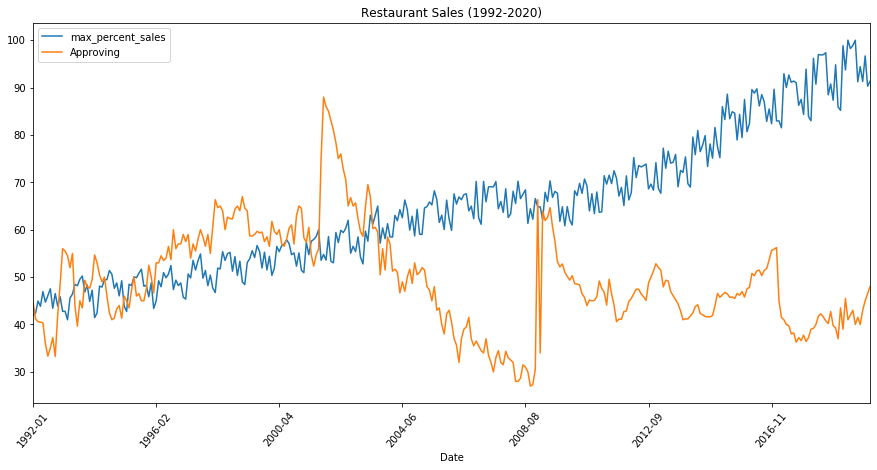

In [25]:
fig = df.plot.line(x='date_month',y=['max_percent_sales', 'Approving'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Restaurant Sales (1992-2020)')


# Adjusting for variance from Nodata/Unsure

In [26]:
df['approval_to_disapproval'] = ((df['Approving'] / (df['Approving'] + df['Disapproving'])) * 100)
df

,Date,Millions_Dollars,inflation_adjusted,restaurant_adjusted,date_month,End Date,Approving,Disapproving,Unsure/NoData,President,max_percent_sales,approval_to_disapproval
0,1992-01-01,13325.0,0.998500,13325.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush,41.964894,48.201439
1,1992-02-01,13474.0,0.994905,13453.789000,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush,42.370494,45.879733
2,1992-03-01,14346.0,0.989831,14272.912868,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush,44.950190,45.211581
3,1992-04-01,14065.0,0.988446,13921.978394,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush,43.844979,44.751381
4,1992-05-01,15077.0,0.987062,14902.794590,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush,46.933899,44.485294
...,...,...,...,...,...,...,...,...,...,...,...,...
336,2019-10-01,56083.0,0.533294,29977.695704,2019-10,2019-10-31,40.000000,57.000000,3.000000,Trump,94.409818,41.237113
337,2019-11-01,54348.0,0.533561,28983.481308,2019-11,2019-11-30,43.000000,54.000000,3.000000,Trump,91.278704,44.329897
338,2019-12-01,57533.0,0.534041,30697.364823,2019-12,2019-12-31,45.000000,51.000000,4.000000,Trump,96.676298,46.875000
339,2020-01-01,53688.0,0.531958,28671.604031,2020-01,2020-01-31,46.500000,51.500000,2.000000,Trump,90.296498,47.448980


Text(0.5, 1.0, 'Restaurant Sales (1992-2020)')

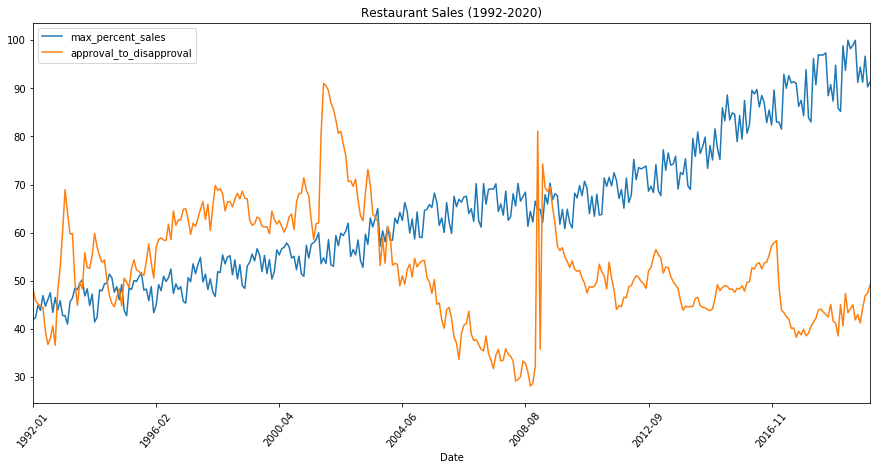

In [27]:
fig = df.plot.line(x='date_month',y=['max_percent_sales', 'approval_to_disapproval'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Restaurant Sales (1992-2020)')

In [28]:
outcome2, predictors2 = patsy.dmatrices('approval_to_disapproval ~ max_percent_sales', df)
mod2 = sm.OLS(outcome2, predictors2)
res2 = mod2.fit()

print(res2.summary())

                               OLS Regression Results                              
Dep. Variable:     approval_to_disapproval   R-squared:                       0.181
Model:                                 OLS   Adj. R-squared:                  0.179
Method:                      Least Squares   F-statistic:                     75.02
Date:                     Thu, 04 Jun 2020   Prob (F-statistic):           1.93e-16
Time:                             10:46:18   Log-Likelihood:                -1285.8
No. Observations:                      341   AIC:                             2576.
Df Residuals:                          339   BIC:                             2583.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

# Stronger Negative Correlation 

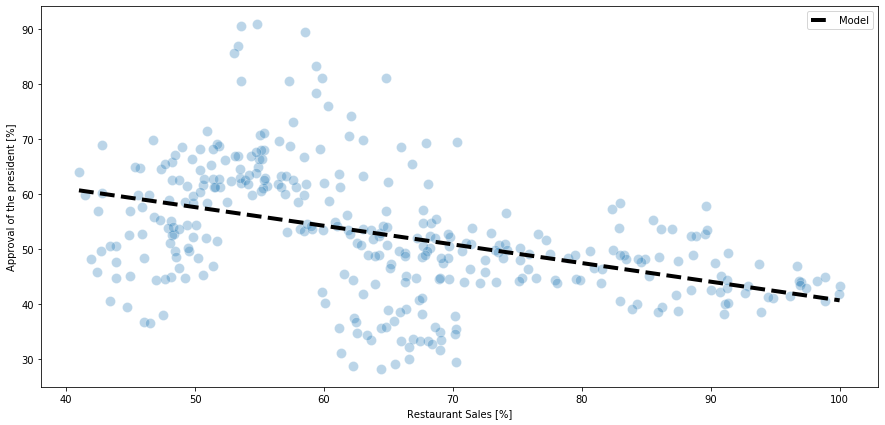

In [29]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='max_percent_sales', y='approval_to_disapproval', alpha=0.3, data=df, s=100)
xs2 = np.arange(df['max_percent_sales'].min(), df['max_percent_sales'].max())
ys2 = -0.3392 * xs2 + 74.6132
plt.plot(xs2, ys2, '--k', linewidth=4, label='Model')

plt.xlabel('Restaurant Sales [%]')
plt.ylabel('Approval of the president [%]')
plt.legend();